Naive Bayes on Amazon Fine Food Reviews.

By: Madhusudan Chandak

Naive Bayes Type:

    -> Multinomial : As it is more suitable for classification of features with discrete integer values.
    

Vectorize/Featurize Method:

    -> BOW
    
    -> TFIDF
    
Test Metrics:

    -> Accuracy
    
    -> F1 Score
    
    -> Confusion Matrix
    
Alpha chosen on the basis of:

    -> f1 score as the data is imbalanced

In [101]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import sqlite3
import nltk
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import matplotlib.pyplot as plt

from tqdm import tqdm
import os
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from prettytable import PrettyTable
import wordcloud
from IPython.core.display import HTML 



In [102]:
if os.path.isfile('final.sqlite'):
    conn = sqlite3.connect('final.sqlite')
    final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score !=3 limit 200000""", conn)
    conn.close()
else:
    print("Please the above cell")

In [103]:
print (final.sort_values('Time'))

         index      Id   ProductId          UserId  \
0       138706  150524  0006641040   ACITT7DI6IDDL   
30      138683  150501  0006641040   AJ46FKXOVC7NR   
424     417839  451856  B00004CXX9   AIUWLEQ1ADEG5   
330     346055  374359  B00004CI84  A344SMIA5JECGM   
423     417838  451855  B00004CXX9   AJH6LUC1UT1ON   
245     346116  374422  B00004CI84  A1048CYU0OV4O8   
308     346041  374343  B00004CI84   A1B2IZU1JLZA6   
215      70688   76882  B00002N8SM  A32DW342WBJ6BX   
261     346141  374450  B00004CI84   ACJR7EQF9S6FP   
325     346094  374400  B00004CI84  A2DEE7F9XKP3ZR   
427     417883  451903  B00004CXX9  A2DEE7F9XKP3ZR   
241       1146    1245  B00002Z754  A29Z5PI9BW2PU3   
242       1145    1244  B00002Z754  A3B8RCEI0FXFI6   
485     121041  131217  B00004RAMX   A5NQLNC6QPGSI   
837     138001  149770  B00004S1C5  A1KXONFPU2XQ5K   
868     138017  149789  B00004S1C6  A1KXONFPU2XQ5K   
249     346115  374421  B00004CI84  A1FJOY14X3MUHE   
296     346102  374408  B000

[200000 rows x 12 columns]


In [104]:
print (final.shape)

(200000, 12)


In [105]:
print(final['CleanedText'].values)

['witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'
 'grew read sendak book watch realli rosi movi incorpor love son love howev miss hard cover version paperback seem kind flimsi take two hand keep page open'
 'fun way children learn month year learn poem throughout school year like handmot invent poem'
 ...
 'tast test agua fresca mango unsweeten agua fresca mango unsweeten soft drink mix packet pack agua fresca pina pineappl unsweeten agua fresca pina pineappl unsweeten soft drink mix packet pack mix two color mango pineappl similar tast similar mango better mix two better one alon use splenda packet hard calori splenda calori per packet label calori sinc splenda tast like sugar bad aftertast chang use slight less cup water make tast richer also increas splenda packet cup make sweeter'
 'bought one differ flavor far much favorit actual tas

In [106]:
#Using BOW to vectorize

trainX_data=final['CleanedText'].values[0:120000]
testX_data= final['CleanedText'].values[160000:]
cvX_data=final['CleanedText'].values[120000:160000]
trainY_data=final['Score'].values[0:120000]
testY_data=final['Score'].values[160000:]
cvY_data=final['Score'].values[120000:160000]

#Vectorising train data
count_vect = CountVectorizer()
final_counts_train = count_vect.fit_transform(trainX_data)
feature=count_vect.get_feature_names()    
#Vectorising cross validation data
final_counts_cv=count_vect.transform(cvX_data)
#Vectorising test data
final_counts_test=count_vect.transform(testX_data)

In [107]:
alphalist=[]

for i in range(-4,4):
    alphalist.append(10**i)
for i in range(-9,10):
    alphalist.append(2**i)
print (alphalist)

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


In [108]:
X_train=final_counts_train
X_test =final_counts_test
X_cv=final_counts_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data


In [109]:

x = PrettyTable(["Vectorizer","Model","Hyperparameter/Alpha","Accuracy","Train error","Test Error","F1 Score"])


CV accuracy for alpha = 0.000100 is 87%

CV f1_score for alpha = 0.000100 is 0.9245436227
Error value : 0.12545

CV accuracy for alpha = 0.001000 is 87%

CV f1_score for alpha = 0.001000 is 0.9251198264
Error value : 0.12420

CV accuracy for alpha = 0.010000 is 87%

CV f1_score for alpha = 0.010000 is 0.9256413359
Error value : 0.12290

CV accuracy for alpha = 0.100000 is 87%

CV f1_score for alpha = 0.100000 is 0.9264621081
Error value : 0.12115

CV accuracy for alpha = 1.000000 is 88%

CV f1_score for alpha = 1.000000 is 0.9319418830
Error value : 0.11347

CV accuracy for alpha = 10.000000 is 85%

CV f1_score for alpha = 10.000000 is 0.9219995840
Error value : 0.14062

CV accuracy for alpha = 100.000000 is 83%

CV f1_score for alpha = 100.000000 is 0.9101089918
Error value : 0.16495

CV accuracy for alpha = 1000.000000 is 83%

CV f1_score for alpha = 1000.000000 is 0.9102450586
Error value : 0.16473

CV accuracy for alpha = 0.001953 is 87%

CV f1_score for alpha = 0.001953 is 0.9252

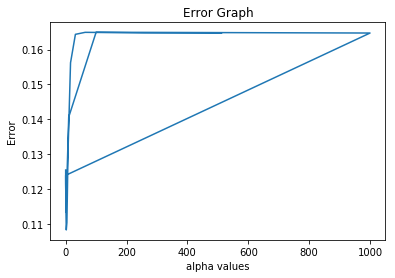

The most optimal value of alpha is 4.00000

****Test accuracy for alpha = 4.000000 is 90%

 Test f1_score for alpha = 4.000000 is 0.9454987563


In [110]:
%matplotlib inline

accuracy=0.0
alpha=0
f1score=0.0
alphavalues=[]
error=[]

#Finding best parameters using Simple Cross Validation
for i in alphalist:
   
    clf = MultinomialNB(alpha=i)

    # fitting the model on crossvalidation train
    clf.fit(X_train, y_train)

    # predict the response on the crossvalidation train
    y_pred=(clf.predict(X_cv))
    
    # evaluate CV accuracy
    accur = accuracy_score(y_cv, y_pred, normalize=True)
    acc = accuracy_score(y_cv, y_pred, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %f is %d%%' % (i, acc))
    f1=f1_score(y_cv, y_pred, average='binary',pos_label='positive')
    print('\nCV f1_score for alpha = %f is %.10f' % (i, f1))
    err=1-accur
    print("Error value : %.5f"%(err))
    error.append(err)
    alphavalues.append(i)

    
    if (f1score<=f1):
        f1score=f1
        alpha=i
        trainerror=err
    else:
        pass


plt.plot(alphavalues,error)
plt.title("Error Graph")
plt.xlabel('alpha values')
plt.ylabel('Error')
plt.show()

print("The most optimal value of alpha is %.5f" %(alpha))
clf = MultinomialNB(alpha)
clf.fit(X_train, y_train)
y_pred=(clf.predict(X_test))
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
accur = accuracy_score(y_test, y_pred)
testerror=(1-accur)
print('\n****Test accuracy for alpha = %f is %d%%' % (alpha,acc))
f1=f1_score(y_test, y_pred,average='binary',pos_label='positive')
print('\n Test f1_score for alpha = %f is %.10f' % (alpha, f1))





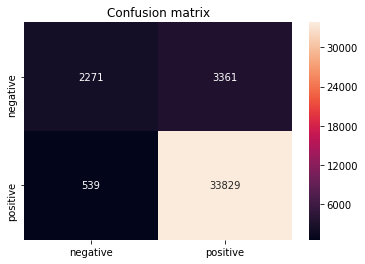

In [111]:
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

In [112]:
#print("\nTop important features for negative class: \n")
topn_class1 = sorted(zip(clf.feature_count_[0], feature),reverse=True)[:100]
#print(topn_class1)
dictnegative={}
dictpositive={}
#print("\n Top important features for positive class: \n")
topn_class2 = sorted(zip(clf.feature_count_[1], feature),reverse=True)[:100]
#print(topn_class2)
for a,b in topn_class1:
    dictnegative[b]=a

#print(dictnegative)

print("\n")

for a,b in topn_class2: 
    dictpositive[b]=a
#print(dictpositive)


x.add_row(['BOW','Multinomial Naive Bayes',alpha,acc,trainerror,testerror,f1])





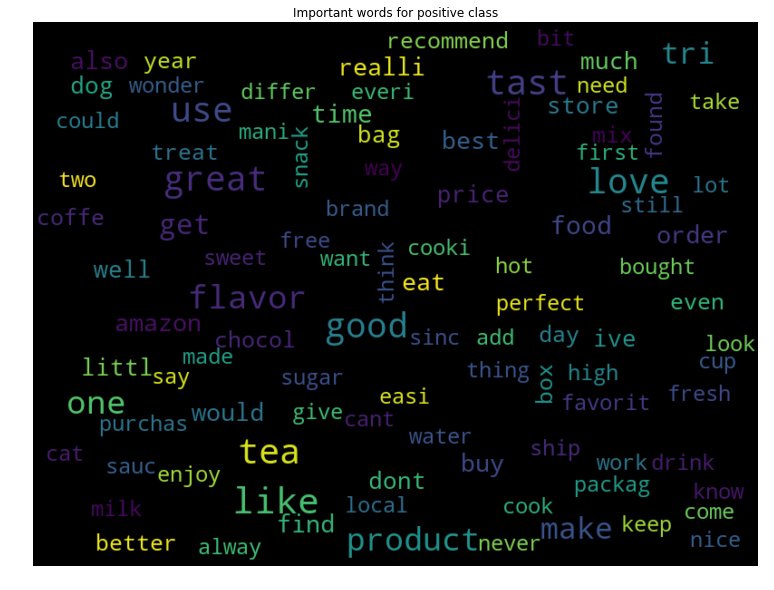

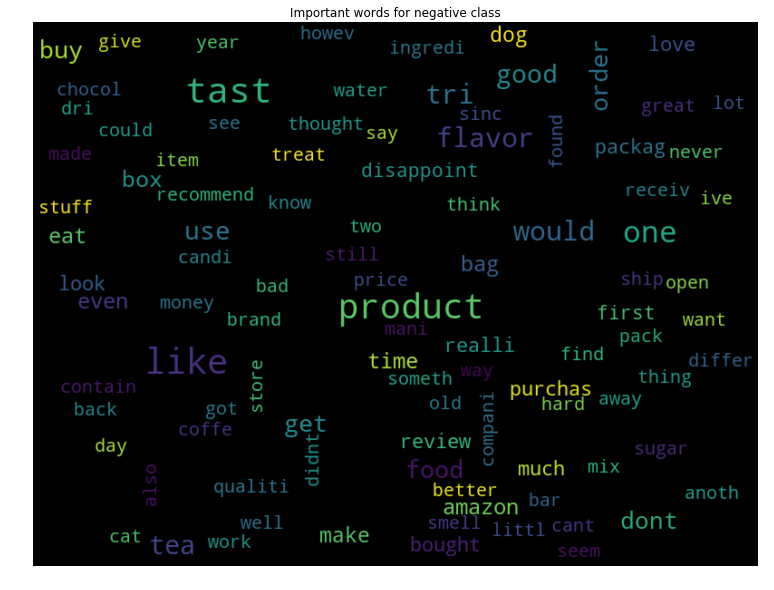

In [113]:
wc=wordcloud.WordCloud(width=800, height=600,max_font_size=40,background_color="black", max_words=1000)
wc.generate_from_frequencies(dictpositive)
plt.figure( figsize=(20,10) )
plt.title("Important words for positive class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.generate_from_frequencies(dictnegative)
plt.figure( figsize=(20,10) )
plt.title("Important words for negative class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()




In [114]:

trainX_data=final['CleanedText'].values[0:120000]
testX_data= final['CleanedText'].values[160000:]
cvX_data=final['CleanedText'].values[120000:160000]
trainY_data=final['Score'].values[0:120000]
testY_data=final['Score'].values[160000:]
cvY_data=final['Score'].values[120000:160000]


tf_idf_vect = TfidfVectorizer(max_features=2000,min_df=50)
final_tf_idf_train = tf_idf_vect.fit_transform(trainX_data)
final_tf_idf_test=tf_idf_vect.transform(testX_data)
final_tf_idf_cv=tf_idf_vect.transform(cvX_data)
feature=tf_idf_vect.get_feature_names() 

In [115]:
X_train=final_tf_idf_train
X_test =final_tf_idf_test
X_cv=final_tf_idf_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data



CV accuracy for alpha = 0.000100 is 86%

CV f1_score for alpha = 0.000100 is 0.9251464103
Error value : 0.13453

CV accuracy for alpha = 0.001000 is 86%

CV f1_score for alpha = 0.001000 is 0.9251464103
Error value : 0.13453

CV accuracy for alpha = 0.010000 is 86%

CV f1_score for alpha = 0.010000 is 0.9251464103
Error value : 0.13453

CV accuracy for alpha = 0.100000 is 86%

CV f1_score for alpha = 0.100000 is 0.9251078036
Error value : 0.13460

CV accuracy for alpha = 1.000000 is 86%

CV f1_score for alpha = 1.000000 is 0.9249680182
Error value : 0.13490

CV accuracy for alpha = 10.000000 is 85%

CV f1_score for alpha = 10.000000 is 0.9205617155
Error value : 0.14382

CV accuracy for alpha = 100.000000 is 83%

CV f1_score for alpha = 100.000000 is 0.9102574581
Error value : 0.16470

CV accuracy for alpha = 1000.000000 is 83%

CV f1_score for alpha = 1000.000000 is 0.9102450586
Error value : 0.16473

CV accuracy for alpha = 0.001953 is 86%

CV f1_score for alpha = 0.001953 is 0.9251

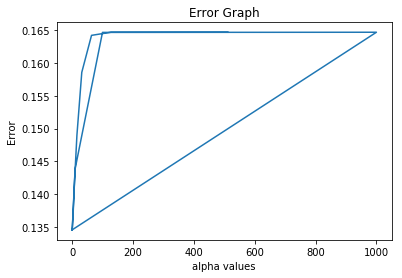

The most optimal value of alpha is 0.25000

****Test accuracy for alpha = 0.250000 is 88%

 Test f1_score for alpha = 0.250000 is 0.9358098880


In [116]:
%matplotlib inline

accuracy=0.0
alpha=0
f1score=0.0
alphavalues=[]
error=[]

#Finding best parameters using Simple Cross Validation
for i in alphalist:
   
    clf = MultinomialNB(alpha=i)

    # fitting the model on crossvalidation train
    clf.fit(X_train, y_train)

    # predict the response on the crossvalidation train
    y_pred=(clf.predict(X_cv))
    
    # evaluate CV accuracy
    accur = accuracy_score(y_cv, y_pred, normalize=True)
    acc = accuracy_score(y_cv, y_pred, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %f is %d%%' % (i, acc))
    f1=f1_score(y_cv, y_pred, average='binary',pos_label='positive')
    print('\nCV f1_score for alpha = %f is %.10f' % (i, f1))
    err=1-accur
    print("Error value : %.5f"%(err))
    error.append(err)
    alphavalues.append(i)

    
    if (f1score<=f1):
        f1score=f1
        alpha=i
        trainerror=err
    else:
        pass


plt.plot(alphavalues,error)
plt.title("Error Graph")
plt.xlabel('alpha values')
plt.ylabel('Error')
plt.show()

print("The most optimal value of alpha is %.5f" %(alpha))
clf = MultinomialNB(alpha)
clf.fit(X_train, y_train)
y_pred=(clf.predict(X_test))
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
accur = accuracy_score(y_test, y_pred)
testerror=(1-accur)
print('\n****Test accuracy for alpha = %f is %d%%' % (alpha,acc))
f1=f1_score(y_test, y_pred,average='binary',pos_label='positive')
print('\n Test f1_score for alpha = %f is %.10f' % (alpha, f1))


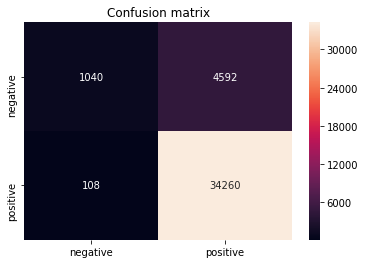

In [117]:
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

In [118]:
#print("\nTop important features for negative class: \n")
topn_class1 = sorted(zip(clf.feature_count_[0], feature),reverse=True)[:100]
#print(topn_class1)
dictnegative={}
dictpositive={}
#print("\n Top important features for positive class: \n")
topn_class2 = sorted(zip(clf.feature_count_[1], feature),reverse=True)[:100]
#print(topn_class2)
for a,b in topn_class1:
    dictnegative[b]=a

#print(dictnegative)

print("\n")

for a,b in topn_class2: 
    dictpositive[b]=a
#print(dictpositive)







In [119]:
x.add_row(['TFIDF','Multinomial Naive Bayes',alpha,acc,trainerror,testerror,f1])


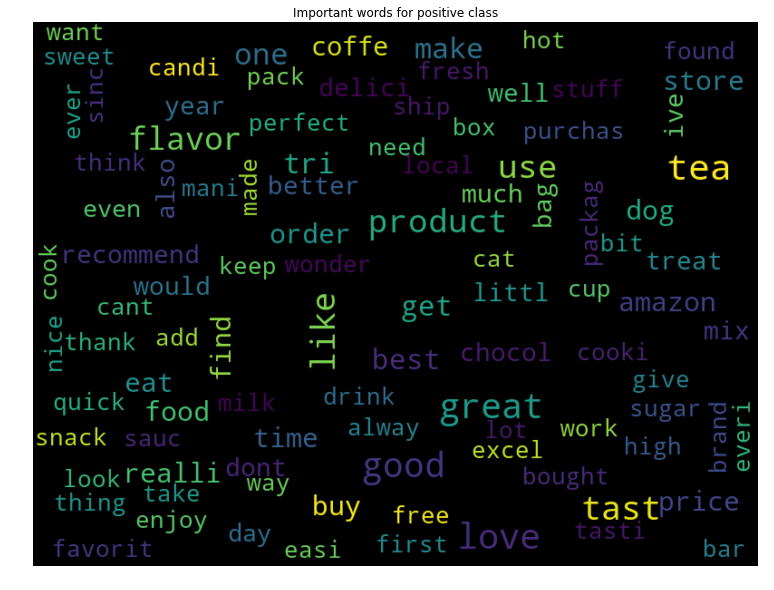

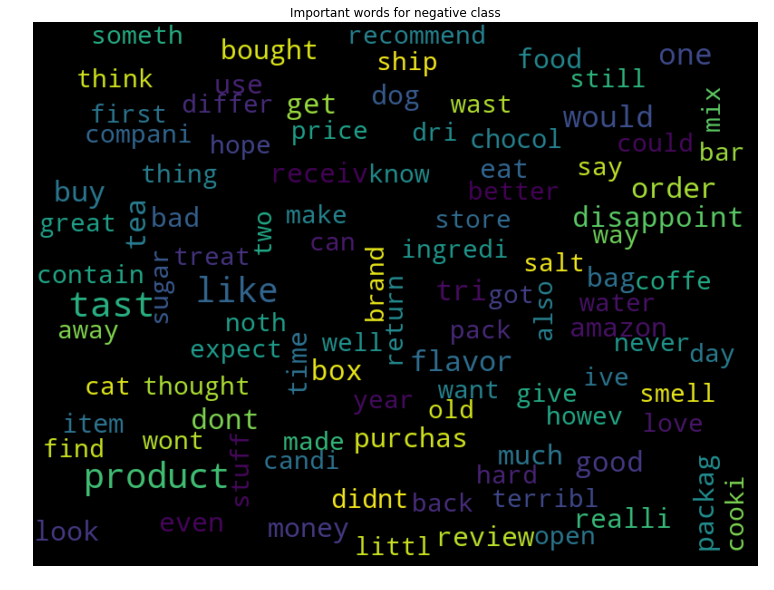

In [120]:
wc=wordcloud.WordCloud(width=800, height=600,max_font_size=40,background_color="black", max_words=1000)
wc.generate_from_frequencies(dictpositive)
plt.figure( figsize=(20,10) )
plt.title("Important words for positive class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

wc.generate_from_frequencies(dictnegative)
plt.figure( figsize=(20,10) )
plt.title("Important words for negative class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Conclusion : 

In [121]:
print(x)

+------------+-------------------------+----------------------+----------+---------------------+---------------------+--------------------+
| Vectorizer |          Model          | Hyperparameter/Alpha | Accuracy |     Train error     |      Test Error     |      F1 Score      |
+------------+-------------------------+----------------------+----------+---------------------+---------------------+--------------------+
|    BOW     | Multinomial Naive Bayes |          4           |  90.25   | 0.11034999999999995 | 0.09750000000000003 | 0.9454987562536684 |
|   TFIDF    | Multinomial Naive Bayes |         0.25         |  88.25   |       0.134525      | 0.11750000000000005 | 0.9358098880087408 |
+------------+-------------------------+----------------------+----------+---------------------+---------------------+--------------------+
